# Functions and Function Spaces

!!! note 
    This notebook currently gives an introduction into functions, but will be
    extended to other concepts like function spaces in the near future.

Operator learning is motivated by the fact that many problems in science and
engineering are formulated in terms of functions.
While conventional neural networks learn between vector-spaces, neural operators
learn mappings between infinite-dimensional function spaces.

This notebook gives an introduction into functions, function spaces (or function sets),
and how these concepts are implemented in Continuity.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

## Functions

A function is a mapping between a set $X$ (domain) and a set $Y$ (co-domain),
denoted by

\begin{align*}
f: X &\rightarrow Y, \\
x &\mapsto f(x).
\end{align*}


For example, the function $f(x)=x^2$ maps each element $x\in X = [-1,1] \subset \mathbb{R}$ to an element of $Y = [0,1] \subset \mathbb{R}$.

In Continuity, functions are handled by a `Function` object that takes a callable as input.
As an example, we define two functions $f$ and $g$: 

$$
f(x) = \sin(\pi x), \qquad g(x) = x^3, \qquad x\in \mathbb{R}.
$$

In [3]:
import torch
from continuity.discrete.function import Function

f = Function(lambda x: torch.sin(torch.pi * x))
g = Function(lambda x: x ** 3)

Functions are evaluated by calling them.

In [4]:
x = torch.linspace(-1, 1, 100)
y = f(x)
z = g(x)

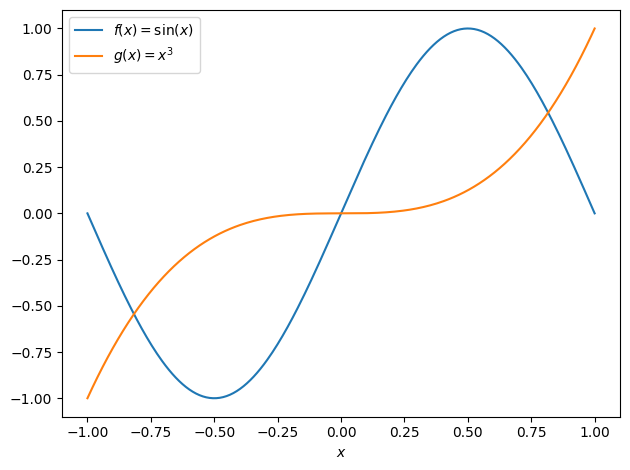

In [5]:
x_plot = torch.linspace(-1, 1, 300)
plt.plot(x_plot, f(x_plot), label="$f(x)=\sin(x)$")
plt.plot(x_plot, g(x_plot), label="$g(x)=x^3$")
plt.xlabel("$x$")
plt.legend()
plt.tight_layout()

Functions can be added to, subtracted from, multiplied with, and divided by other functions.
For instance:

In [6]:
h_1 = f + g
h_2 = (-1) * (f + g)

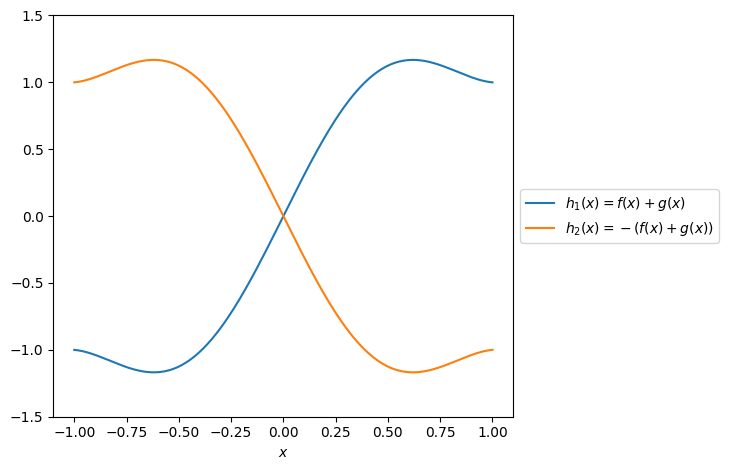

In [7]:
fig, ax = plt.subplots()
ax.plot(x_plot, h_1(x_plot), label="$h_1(x)=f(x)+g(x)$")
ax.plot(x_plot, h_2(x_plot), label="$h_2(x)=-(f(x)+ g(x))$")
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("$x$")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Function Sets

 For a domain $X$ supported on a field $K_1$, and the codomain $Y$ supported on a field $K_2$ a function space is the set of functions $F(X, Y)$ that map from $X$ to $Y$. The set $F(X,Y)$ becomes a vector space if the addition $(f+g)(x):X \rightarrow Y, x\mapsto f(x)+g(x)$ and scalar multiplication $(c\cdot f)(x) \rightarrow Y, x\mapsto c\cdot f(x)$ are supported for all functions in this set. 

In Continuity we deal with discrete representations of function spaces. As the two properties above can not always be respected (especially in the context of discrete representations of functions) we call these sets function sets.
Here we define a sine wave model
$$
y = \beta \cdot \sin(k x +\varphi ),\quad A=[\beta, k, \varphi]^\top\in\mathbb{R}^3,\quad x, y\in\mathbb{R}.
$$
For this set the property of scalar multiplication holds, but addition fails. Thus, this set of functions is not a function space. In Continuity function sets are handled by a `FunctionSet` and takes a callable (with two args) as input.

In [8]:
from continuity.discrete.function_set import FunctionSet

sine_set = FunctionSet(lambda a, x: a[0] * torch.sin(a[1] * x + a[2]))

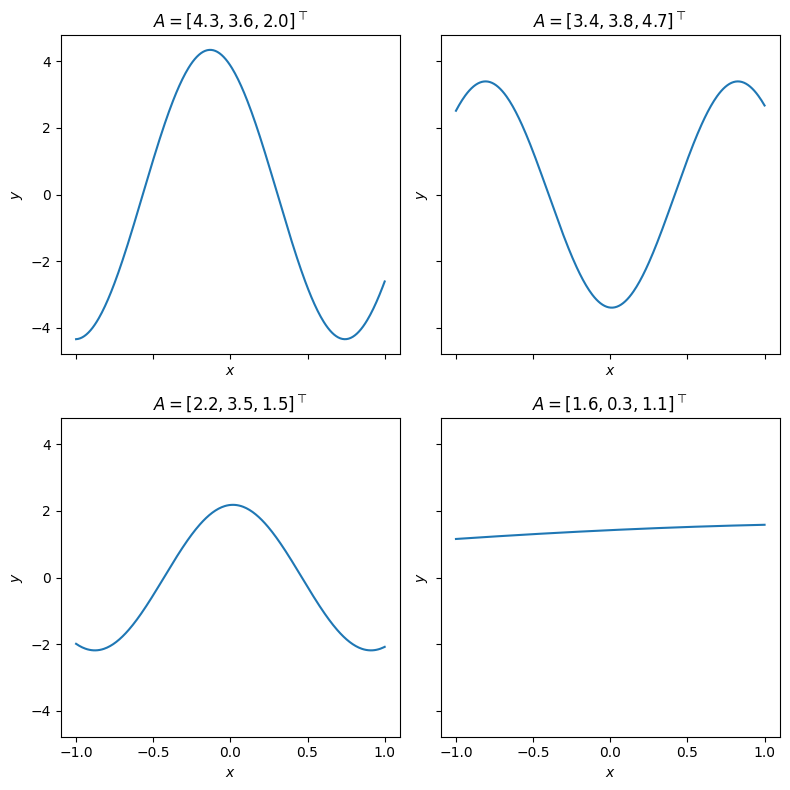

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

a = 5 * torch.rand(4,3)

for i, ai in enumerate(a):
    row, col = i // 2, i % 2
    param = [f'{nbr: .1f}' for nbr in ai.tolist()]
    axs[row, col].plot(x_plot, sine_set(ai, x_plot))
    axs[row, col].title.set_text(rf"$A=[{','.join(param)}]^\top$")
    axs[row, col].set_xlabel("$x$")
    axs[row, col].set_ylabel("$y$")
fig.tight_layout()